In [4]:
import importlib
import utils
import visualization

importlib.reload(utils)
importlib.reload(visualization)
%reload_ext autoreload
%autoreload 2
from utils import *
from visualization import visualize
pd.set_option('display.max_colwidth', None)


In [5]:
excel_path = "/home/viktoria/Downloads/ARBOLES ALIMENTOS EJERCICIO KABELLI.xlsx"
# all data
df_all = load_all_sheets(excel_path)
print("Numbre os samples in the dataset:", df_all.shape[0])

Numbre os samples in the dataset: 2381


### Busqueda de los productos iguales que tienen SKU iguales en las diferentes subempresas

In [6]:
data = load_all_sheets(excel_path)

correct_products = find_similar_products(data, 90, different_sku=False)
correct_products = correct_products.copy()
correct_products = remove_flavor_variants(correct_products)
columns_to_show = [col for col in correct_products.columns if col not in ['Numbers 1', 'Numbers 2']]
correct_products = correct_products.loc[:, columns_to_show]
exact_matches = correct_products[correct_products['Similarity'] == 100]
partial_matches = correct_products[correct_products['Similarity'] < 100]

In [7]:
# Los productos que tienen nombres iguales y SKU iguales
same_name_same_sku = exact_matches.shape[0]
print(same_name_same_sku)

264


In [8]:
exact_matches.head(10)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity
0,DUL-SUC,ENDULZANTE DUL-SUC CON STEVIA LIQUIDO 270 ML,88250,Prinorte Arbol_24_25,ENDULZANTE DUL-SUC CON STEVIA LIQUIDO 270 ML,88250,Prisur Arbol_24_25,100
1,ONZA,ENDULZANTE ONZA 0.5 GR SUCRALOSA X 1000 SAC.PRISA,28005,PRISA Arbol_24_25,ENDULZANTE ONZA 0.5 GR SUCRALOSA X 1000 SAC.PRISA,28005,Prinorte Arbol_24_25,100
2,VITELLI,SOPA INST. 65 GR SABOR CARNE VITELLI,72472,Surtiventas Arbol_24_25,SOPA INST. 65 GR SABOR CARNE VITELLI,72472,Prisur Arbol_24_25,100
3,VITELLI,SOPA INST. 65 GR SABOR CAMARON VITELLI,72472,Surtiventas Arbol_24_25,SOPA INST. 65 GR SABOR CAMARON VITELLI,72472,Prisur Arbol_24_25,100
4,COLORADO,CHORITOS NATURAL 190 GR COLORADO,74857,Surtiventas Arbol_24_25,CHORITOS NATURAL 190 GR COLORADO,74857,Prisur Arbol_24_25,100
5,COLORADO,CHORITOS ACEITE 190 GR COLORADO,74858,Surtiventas Arbol_24_25,CHORITOS ACEITE 190 GR COLORADO,74858,Prisur Arbol_24_25,100
6,AMERICA,SURTIDO MARISCO 425 GR NATURAL AMERICA,74869,Surtiventas Arbol_24_25,SURTIDO MARISCO 425 GR NATURAL AMERICA,74869,Prisur Arbol_24_25,100
7,AMERICA,SURTIDO MARISCO 425 GR ACEITE AMERICA,74869,Surtiventas Arbol_24_25,SURTIDO MARISCO 425 GR ACEITE AMERICA,74869,Prisur Arbol_24_25,100
8,AMERICA,SURTIDO MARISCO 190 GR NATURAL AMERICA,74870,Surtiventas Arbol_24_25,SURTIDO MARISCO 190 GR NATURAL AMERICA,74870,Prisur Arbol_24_25,100
9,AMERICA,JIBIA AL NATURAL 425 GR AMERICA,74868,Surtiventas Arbol_24_25,JIBIA AL NATURAL 425 GR AMERICA,74868,Prisur Arbol_24_25,100


In [9]:
# L0s productos que tienen nombres parecidos pero no iguales, SKU son iguales
similar_name_same_sku = partial_matches.shape[0]
print(similar_name_same_sku)

195


In [10]:
partial_matches.head(10)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity
264,GOURMET,CONDIMENTO COMINO MOLIDO 15 GR X 50 UN GOURMET,41025,Surtiventas Arbol_24_25,CONDIMENTO COMINO MOLIDO 15 GR X 50 UND GOURMET,41025,Prisur Arbol_24_25,99
265,GOURMET,CONDIMENTO CURRY EN POLVO 15 GR X 50 UN GOURMET,41026,Surtiventas Arbol_24_25,CONDIMENTO CURRY EN POLVO 15 GR X 50 UND GOURMET,41026,Prisur Arbol_24_25,99
266,SVELTY,LECHE EN POLVO 800 GR. SVELTY DESCRE. SOFTPACK,88276,PRISA Arbol_24_25,LECHE EN POLVO 800 GR SVELTY DESCR. SOFTPACK,88276,Prinorte Arbol_24_25,99
267,GOURMET,ESCENCIA DE VAINILLA 100 CC GOURMET,41078,Surtiventas Arbol_24_25,ESENCIA DE VAINILLA 100 CC GOURMET,41078,Prisur Arbol_24_25,99
268,GOURMET,ESCENCIA COLA DE MONO 100 CC GOURMET,41076,Surtiventas Arbol_24_25,ESENCIA COLA DE MONO 100 CC GOURMET,41076,Prisur Arbol_24_25,99
269,GOURMET,ESCENCIA DE PAN DE PASCUA 60 CC GOURMET,41077,Surtiventas Arbol_24_25,ESENCIA DE PAN DE PASCUA 60 CC GOURMET,41077,Prisur Arbol_24_25,99
270,GOURMET,BASE P/HAMBURGUESA 90 GR X 15 UN GOURMET,41043,Surtiventas Arbol_24_25,BASE P/HAMBURGUESA 90 GR X 15 UND GOURMET,41043,Prisur Arbol_24_25,99
271,GOURMET,CONDIMENTO CANELA ENTERA 15 GR X 50 UN GOURMET,41022,Surtiventas Arbol_24_25,CONDIMENTO CANELA ENTERA 15 GR X 50 UND GOURMET,41022,Prisur Arbol_24_25,99
272,GOURMET,CONDIMENTO ALI¥O COMPLETO 15 GR X 50 UN GOURMET,41020,Surtiventas Arbol_24_25,CONDIMENTO ALI¥O COMPLETO 15 GR X 50 UND GOURMET,41020,Prisur Arbol_24_25,99
273,GOURMET,CONDIMENTO BICARBONATO 30 GR X 50 UN GOURMET,41021,Surtiventas Arbol_24_25,CONDIMENTO BICARBONATO 30 GR X 50 UND GOURMET,41021,Prisur Arbol_24_25,99


### Busqueda de los productos iguales que tienen diferentes SKU

In [17]:
#Busqueda de los productos iguales que tienen diferentes SKU

In [12]:
excel_path = "/home/viktoria/Downloads/ARBOLES ALIMENTOS EJERCICIO KABELLI.xlsx"

confident, needs_review = process_excel_for_duplicates(
    excel_path,
    confidence_threshold=93,
    low_confidence_threshold=88
)


In [13]:
different_sku_conf = confident.shape[0]
different_sku_conf

58

In [14]:
different_sku_review = needs_review.shape[0]
different_sku_review

35

In [21]:
confident.head(30)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
0,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,75969,Surtiventas Arbol_24_25,ATUN DESMENUZADO AGUA 170 GR COLISEO,85102,Prisur Arbol_24_25,100,[170.0],[170.0]
1,COLISEO,AZUCAR 1 KG COLISEO,22960,Surtiventas Arbol_24_25,AZUCAR 1 KG. COLISEO,71978,Prisur Arbol_24_25,100,[1.0],[1.0]
2,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,97840,PRISA Arbol_24_25,ATUN DESMENUZADO AGUA 170 GR COLISEO,85102,Prisur Arbol_24_25,100,[170.0],[170.0]
3,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,97840,PRISA Arbol_24_25,ATUN DESMENUZADO AGUA 170 GR COLISEO,75969,Surtiventas Arbol_24_25,100,[170.0],[170.0]
4,BELMONT,ACEITE COCINA 250 CC. VEGETAL BELMONT,79094,Prinorte Arbol_24_25,ACEITE COCINA 250 CC. VEGETAL BELMONT,19256,Prisur Arbol_24_25,100,[250.0],[250.0]
5,IANSA,AZUCAR 5 GR X 800 SACHET APROX. IANSA.,99845,PRISA Arbol_24_25,AZUCAR 5 GR X 800 SACHET APROX. IANSA,14395,Prisur Arbol_24_25,100,"[5.0, 800.0]","[5.0, 800.0]"
6,COLISEO,AZUCAR 1 KG. COLISEO,22960,Prinorte Arbol_24_25,AZUCAR 1 KG. COLISEO,71978,Prisur Arbol_24_25,100,[1.0],[1.0]
7,COLISEO,POROTO 1 KG. HALLADO COLISEO,75760,Surtiventas Arbol_24_25,POROTO 1 KG. COLISEO HALLADO,85096,Prisur Arbol_24_25,100,[1.0],[1.0]
8,COLISEO,LENTEJA 1 KG. 6 MM COLISEO,75758,Surtiventas Arbol_24_25,LENTEJA 1 KG 6 MM COLISEO,85092,Prisur Arbol_24_25,100,"[1.0, 6.0]","[1.0, 6.0]"
9,BELMONT,ACEITE COCINA 250 CC. VEGETAL BELMONT,79094,Surtiventas Arbol_24_25,ACEITE COCINA 250 CC. VEGETAL BELMONT,19256,Prisur Arbol_24_25,100,[250.0],[250.0]


In [22]:
confident.tail(30)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
28,COSTA,GALLETA COSTA MINI MANTEQUILLA 35 GR.,18928,PRISA Arbol_24_25,GALLETA COSTA 35 GR MINI MANTEQUILLA,52753,Surtiventas Arbol_24_25,100,[35.0],[35.0]
29,NESTLE,CREMA DE LECHE NESTLE 157 GR,85155,Surtiventas Arbol_24_25,CREMA DE LECHE 157 GR NESTLE,99862,Prisur Arbol_24_25,100,[157.0],[157.0]
30,ALOE WIN,BEBIDA ALOE VERA 500 ML PI¥A ALOE WIN,35160,Surtiventas Arbol_24_25,BEBIDA ALOE VERA 500 ML PINA ALOE WIN,72475,Prisur Arbol_24_25,99,[500.0],[500.0]
31,HOMAR,PALMITO 400 GR RODAJA TARRO HOMAR,72720,Surtiventas Arbol_24_25,PALMITOS 400 GR RODAJA TARRO HOMAR,82606,Prisur Arbol_24_25,99,[400.0],[400.0]
32,SAN JOSE,ATUN LOMITOS ACEITE 160 GR SAN JOSE,72495,Surtiventas Arbol_24_25,ATUN LOMITO ACEITE 160 GR SAN JOSE,74855,Prisur Arbol_24_25,99,[160.0],[160.0]
33,COSTA,CEREAL BARRA COSTA FRUTAS + YOGURT X 20 UDS,36035,PRISA Arbol_24_25,CEREAL BARRA COSTA FRUTOS + YOGURT X 20 UDS,70941,Prisur Arbol_24_25,98,[20.0],[20.0]
34,HOMAR,ATUN LOMITOS ACEITE 140 GR HOMAR,72423,Surtiventas Arbol_24_25,ATUN LOMITO ACEITE 140 GR HOMAR,82598,Prisur Arbol_24_25,98,[140.0],[140.0]
35,HOMAR,ATUN LOMITOS AGUA 140 GR HOMAR,72424,Surtiventas Arbol_24_25,ATUN LOMITO AGUA 140 GR HOMAR,82599,Prisur Arbol_24_25,98,[140.0],[140.0]
36,SAN JOSE,ATUN LOMITOS AGUA 160 GR SAN JOSE,78799,Surtiventas Arbol_24_25,ATUN AGUA LOMITO 160 GR SAN JOSE,74854,Prisur Arbol_24_25,98,[160.0],[160.0]
37,NESTLE,CREMA DE LECHE NESTLE 157 GRS.,85155,PRISA Arbol_24_25,CREMA DE LECHE 157 GR NESTLE,99862,Prisur Arbol_24_25,98,[157.0],[157.0]


In [23]:
needs_review.head(40)
# Aparecen poductos que ya pueden ser diferentes como
#CEREAL BARRA COSTA FRUTOS ROJOS + YOGURT X 20 UDS	 -  CEREAL BARRA COSTA FRUTOS ROJOS (No tiene Yogurt)
# SALSA DE SOYA SUAVE 165 CC GOURMET -  SALSA DE SOYA SUAVE 165 CC GOURMET (tiene Sauve)
#	YERBA MATE 250 GR. SUPREMO ARGENTIN -	YERBA MATE 250 GR SUPREMO ARGENTINA NARANJA
# CAFE INST. JUAN VALDEZ 95 GR LIOFILIZADO DESCAFEIN	-  CAFE 95 GR JUAN VALDEZ INST. LIOFILIZADO
# Pero la mayoria son iguales

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
0,NESCAFE,CAFE INST. NESCAFE TRADICION 400 GR POLVO TARRO,12596,PRISA Arbol_24_25,CAFE 400 GR NESCAFE TRADICIONAL POLVO TARRO,89295,Prisur Arbol_24_25,92,[400.0],[400.0]
1,ALOE WIN,BEBIDA ALOE WIN 500 CC ALOE VERA MANGO,12566,PRISA Arbol_24_25,BEBIDA ALOE VERA 500 ML MANGO ALOE WIN,72475,Prisur Arbol_24_25,92,[500.0],[500.0]
2,COLISEO,FIDEO 400 GR SPAGUETTI COLISEO SPECIALE,54052,Surtiventas Arbol_24_25,PASTA FIDEO 400 GR COLISEO SPAGUETTI SPECIAL,72501,Prisur Arbol_24_25,92,[400.0],[400.0]
3,LUCCHETTI,FIDEO 400 GR TALLARIN 77 LUCCHETTI,24295,Surtiventas Arbol_24_25,PASTA FIDEO 400 GR LUCCHETTI TALLARIN 77,75555,Prisur Arbol_24_25,92,"[400.0, 77.0]","[400.0, 77.0]"
4,COSTA,CEREAL BARRA COSTA FRUTOS ROJOS + YOGURT X 20 UDS,36035,PRISA Arbol_24_25,CEREAL BARRA COSTA FRUTOS ROJOS X 20 UDS,75263,Prisur Arbol_24_25,92,[20.0],[20.0]
5,WASIL,ARVEJA 340 CC. WASIL TETRA,57039,Surtiventas Arbol_24_25,ARVEJA 340 GR. WASIL TETRA,57031,Prisur Arbol_24_25,92,[340.0],[340.0]
6,ALOE WIN,BEBIDA ALOE WIN 500 CC ALOE VERA MANGO,12566,PRISA Arbol_24_25,BEBIDA ALOE VERA 500 ML MANGO ALOE WIN,35160,Surtiventas Arbol_24_25,92,[500.0],[500.0]
7,NESCAFE,CAFE 420 GR NESCAFE TRADICION GRANULADO TARRO,89295,Prinorte Arbol_24_25,CAFE 420 GR NESCAFE TRADICIONAL GRANULADO,12596,Prisur Arbol_24_25,91,[420.0],[420.0]
8,JUAN VALDEZ,CAFE INST. JUAN VALDEZ 95 GR LIOFILIZADO ORGANICO,19313,PRISA Arbol_24_25,CAFE 95 GR JUAN VALDEZ INST. LIOFILIZADO,19283,Prinorte Arbol_24_25,90,[95.0],[95.0]
9,IANSA,AZUCAR FLOR MATE IANSA 1 KG,89241,PRISA Arbol_24_25,AZUCAR FLOR 1 KG IANSA,35308,Prisur Arbol_24_25,90,[1.0],[1.0]


In [24]:
confident.to_excel("confident_matches.xlsx", index=False)
needs_review.to_excel("needs_review_matches.xlsx", index=False)

In [25]:
# Revisemos los productos con similitud inferior al umbral
# Ya son productos diferentes

In [26]:
excel_path = "/home/viktoria/Downloads/ARBOLES ALIMENTOS EJERCICIO KABELLI.xlsx"

_, different_products = process_excel_for_duplicates(
    excel_path,
    confidence_threshold=88,
    low_confidence_threshold=84,
)

In [27]:
different_products.shape

(22, 10)

In [28]:
different_products.head(38)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
0,ALCAFOOD,PURE DE PAPA 250 GR ALCAFOOD,72211,Surtiventas Arbol_24_25,PURE DE PAPAS 250 GR ESTUCHE ALCAFOOD,72450,Prisur Arbol_24_25,86,[250.0],[250.0]
1,WASIL,PINAS CUBO 565 GR WASIL,52300,Surtiventas Arbol_24_25,PI¥AS EN CUBITOS 565 GR WASIL,52890,Prisur Arbol_24_25,86,[565.0],[565.0]
2,COLISEO,FIDEO 400 GR PENNE RIGATE COLISEO SPECIALE,54052,Surtiventas Arbol_24_25,PASTA FIDEO 400 GR COLISEO RIGATONI SPECIALE,72501,Prisur Arbol_24_25,86,[400.0],[400.0]
3,DULCEDIA,ALFAJOR 3 CAPAS CH/NEGRO X 24 UN X 60 GR DULCEDIA,35159,Surtiventas Arbol_24_25,ALFAJOR 3 CAPAS CH/ NEGRO 24 UN X 60 GR DULCEDIA,92321,Prisur Arbol_24_25,86,"[3.0, 24.0, 60.0]","[3.0, 24.0, 60.0]"
4,KRAFT,MAYONESA 90 GR SACHET DP X 18 UN DELI KRAFT,92286,Surtiventas Arbol_24_25,MOSTAZA 90 GR SACHET DP X 18 UN KRAFT,35318,Prisur Arbol_24_25,85,"[90.0, 18.0]","[90.0, 18.0]"
5,KRAFT,MAYONESA 90 GR SACHET DP X 18 UN DELI KRAFT,41682,Prinorte Arbol_24_25,MOSTAZA 90 GR SACHET DP X 18 UN KRAFT,35318,Prisur Arbol_24_25,85,"[90.0, 18.0]","[90.0, 18.0]"
6,IANSA,AZUCAR 1 KL. IANSA BOLSA,99839,PRISA Arbol_24_25,AZUCAR RUBIA 1 KG IANSA BOLSA,82942,Prisur Arbol_24_25,85,[1.0],[1.0]
7,KRAFT,MOSTAZA 90 GR SACHET DP X 18 UN KRAFT,35318,Surtiventas Arbol_24_25,MAYONESA 90 GR SACHET DP X 18 UN DELI KRAFT,92286,Prisur Arbol_24_25,85,"[90.0, 18.0]","[90.0, 18.0]"
8,KRAFT,MOSTAZA 90 GR SACHET DP X 18 UN KRAFT,35318,Surtiventas Arbol_24_25,MAYONESA 90 GR SACHET DP X 18 UN DELI KRAFT,41682,Prinorte Arbol_24_25,85,"[90.0, 18.0]","[90.0, 18.0]"
9,COLISEO,FIDEO 400 GR SPAGUETTI COLISEO SPECIALE,54052,Surtiventas Arbol_24_25,PASTA FIDEO 400 GR COLISEO RIGATONI SPECIALE,72501,Prisur Arbol_24_25,84,[400.0],[400.0]


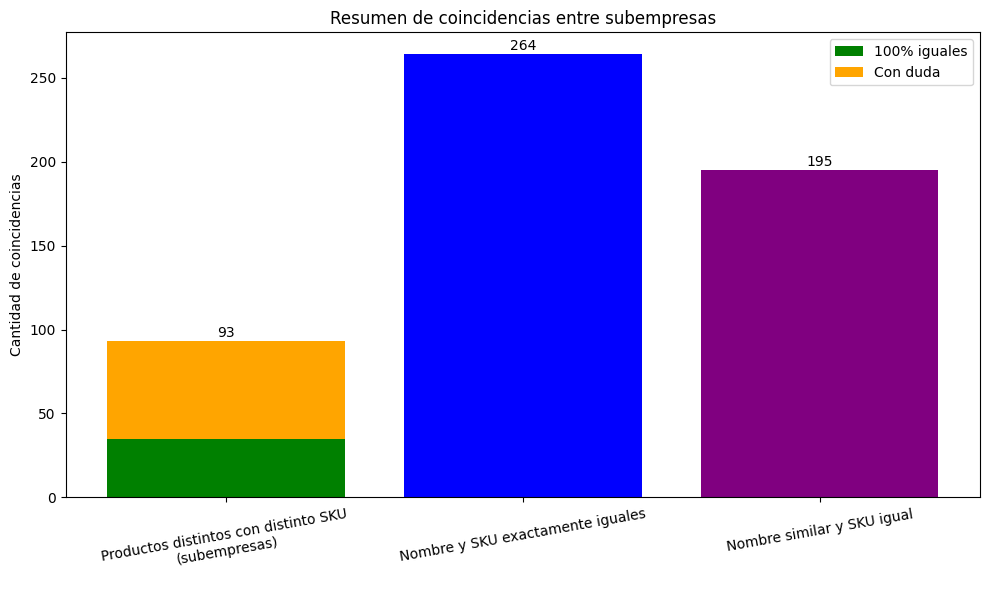

In [15]:
visualize(different_sku_review, different_sku_conf, same_name_same_sku, similar_name_same_sku)
